In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# graficos incrustados
%matplotlib inline

# Leer el archivo CSV especificando los tipos de datos


df = pd.read_csv('rows.csv')
df.sample(5)
columns_in_df = df.columns.tolist()
print("Columns in DataFrame:", columns_in_df)

C:\Users\valentino\AppData\Local\Temp\ipykernel_13004\2326603342.py:21: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('rows.csv')


Columns in DataFrame: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via                 1282355 non-

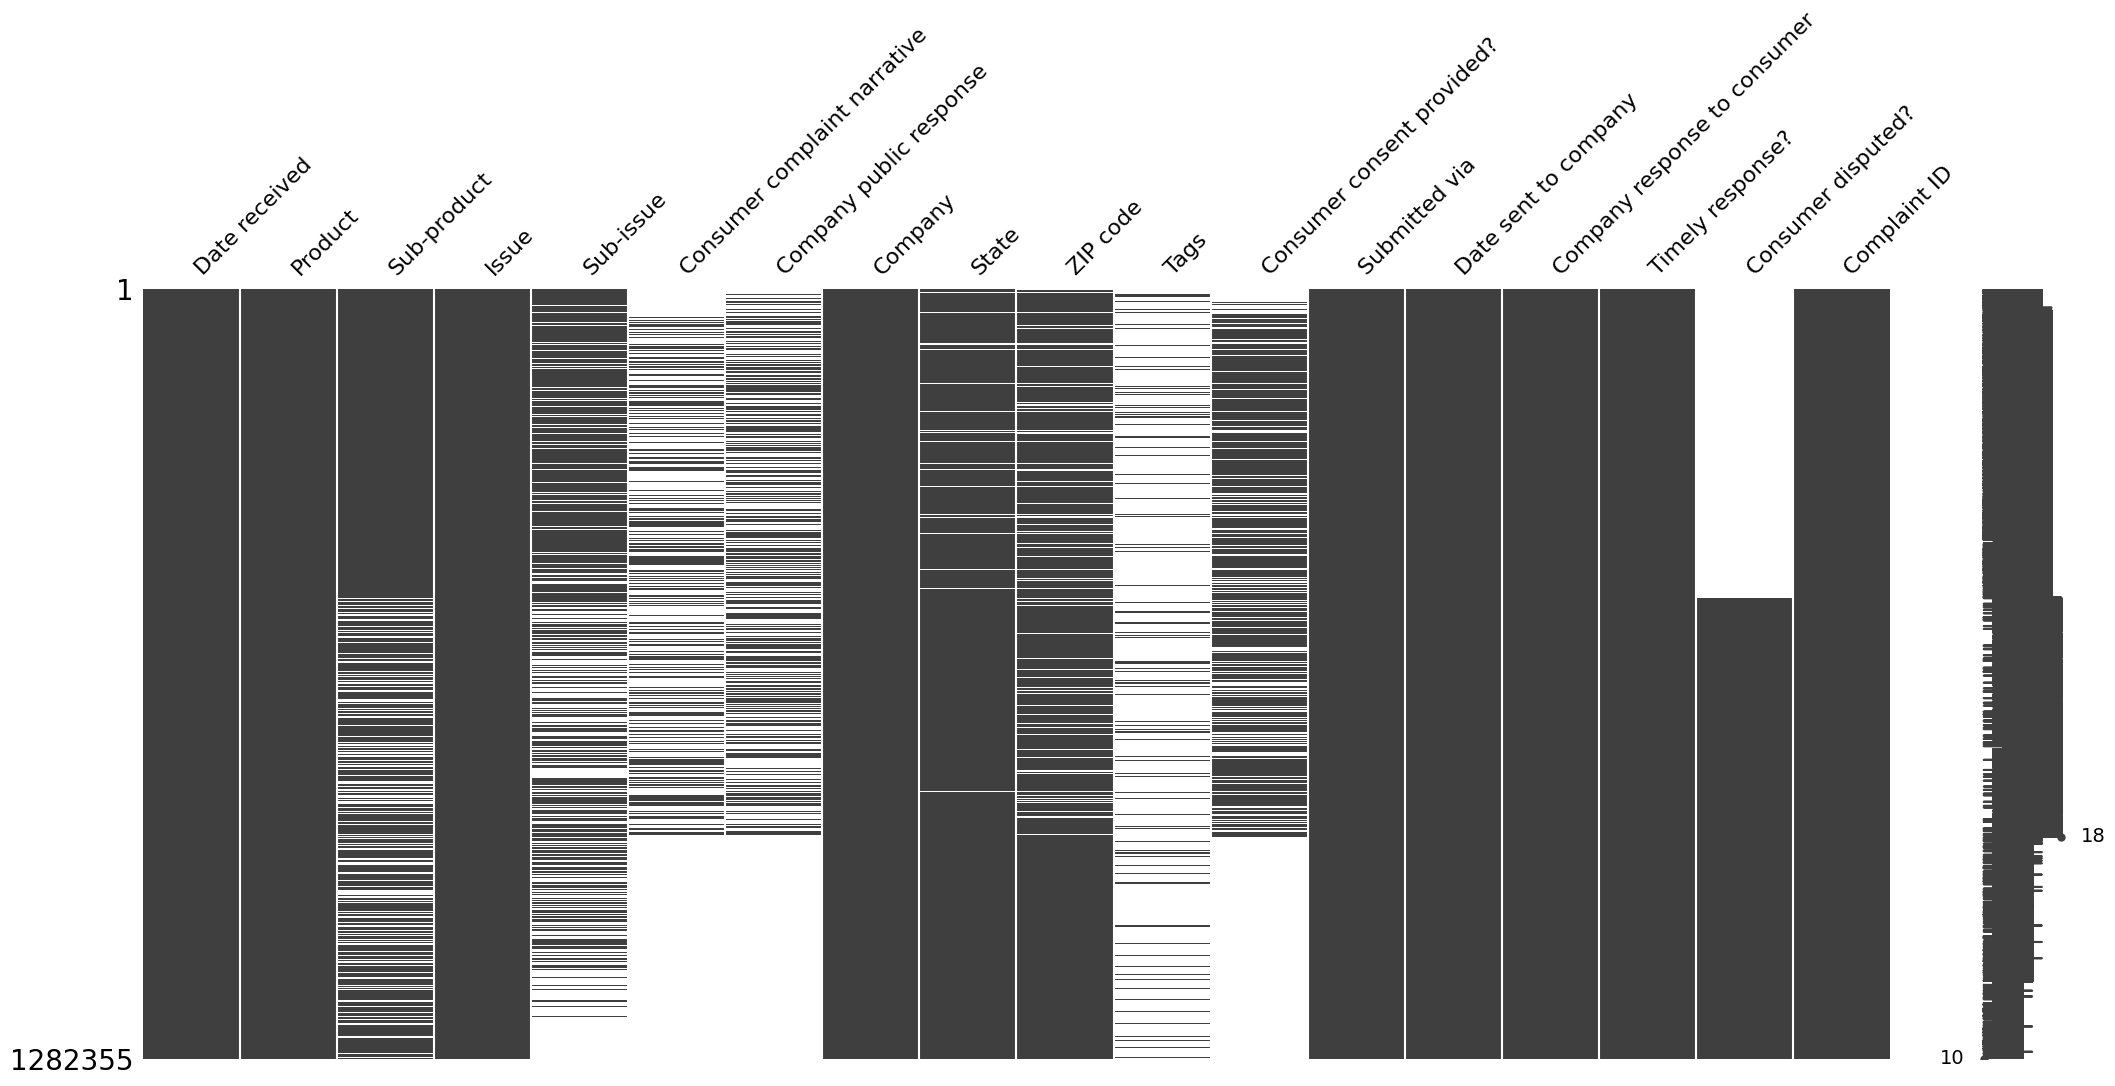

In [5]:
from scipy import stats
import missingno
missingno.matrix(df)
plt.show()

Eliminar columanas que no nos sirven

In [12]:
# Lista de columnas a eliminar
columns_to_drop = [ 'State','Consumer complaint narrative', 'Sub-issue', 'Company public response', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

# 'Assessed Value', 'Sale Amount'

# Verificar la existencia de las columnas en el DataFrame
columns_in_df = df.columns.tolist()
print("Columns in DataFrame:", columns_in_df)

# Filtrar columnas que existen en el DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in columns_in_df]
print("Columns to drop that exist in DataFrame:", columns_to_drop_existing)

# Crear una copia del DataFrame original
df2 = df.copy()

# Eliminar las columnas especificadas que existen en el DataFrame
df2.drop(columns_to_drop_existing, inplace=True, axis=1)

# Verificar que las columnas han sido eliminadas
print(df2.head())

Columns in DataFrame: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']
Columns to drop that exist in DataFrame: ['State', 'Consumer complaint narrative', 'Sub-issue', 'Company public response', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']
  Date received                                            Product                       Sub-product                                 Issue                         Company
0    05/10/2019                        Checking or savings account                  Checking account                   Managing an account       NAVY FEDERAL CREDIT UNION
1    0

In [13]:
df2.describe(include="all").transpose()

,count,unique,top,freq
Date received,1282355,2717,09/08/2017,3553
Product,1282355,18,Mortgage,278098
Sub-product,1047189,76,Credit reporting,221652
Issue,1282355,167,Incorrect information on your report,134338
Company,1282355,5275,"EQUIFAX, INC.",115703


C:\Users\valentino\AppData\Local\Temp\ipykernel_13004\1530666495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product',data=df2,palette='Blues')


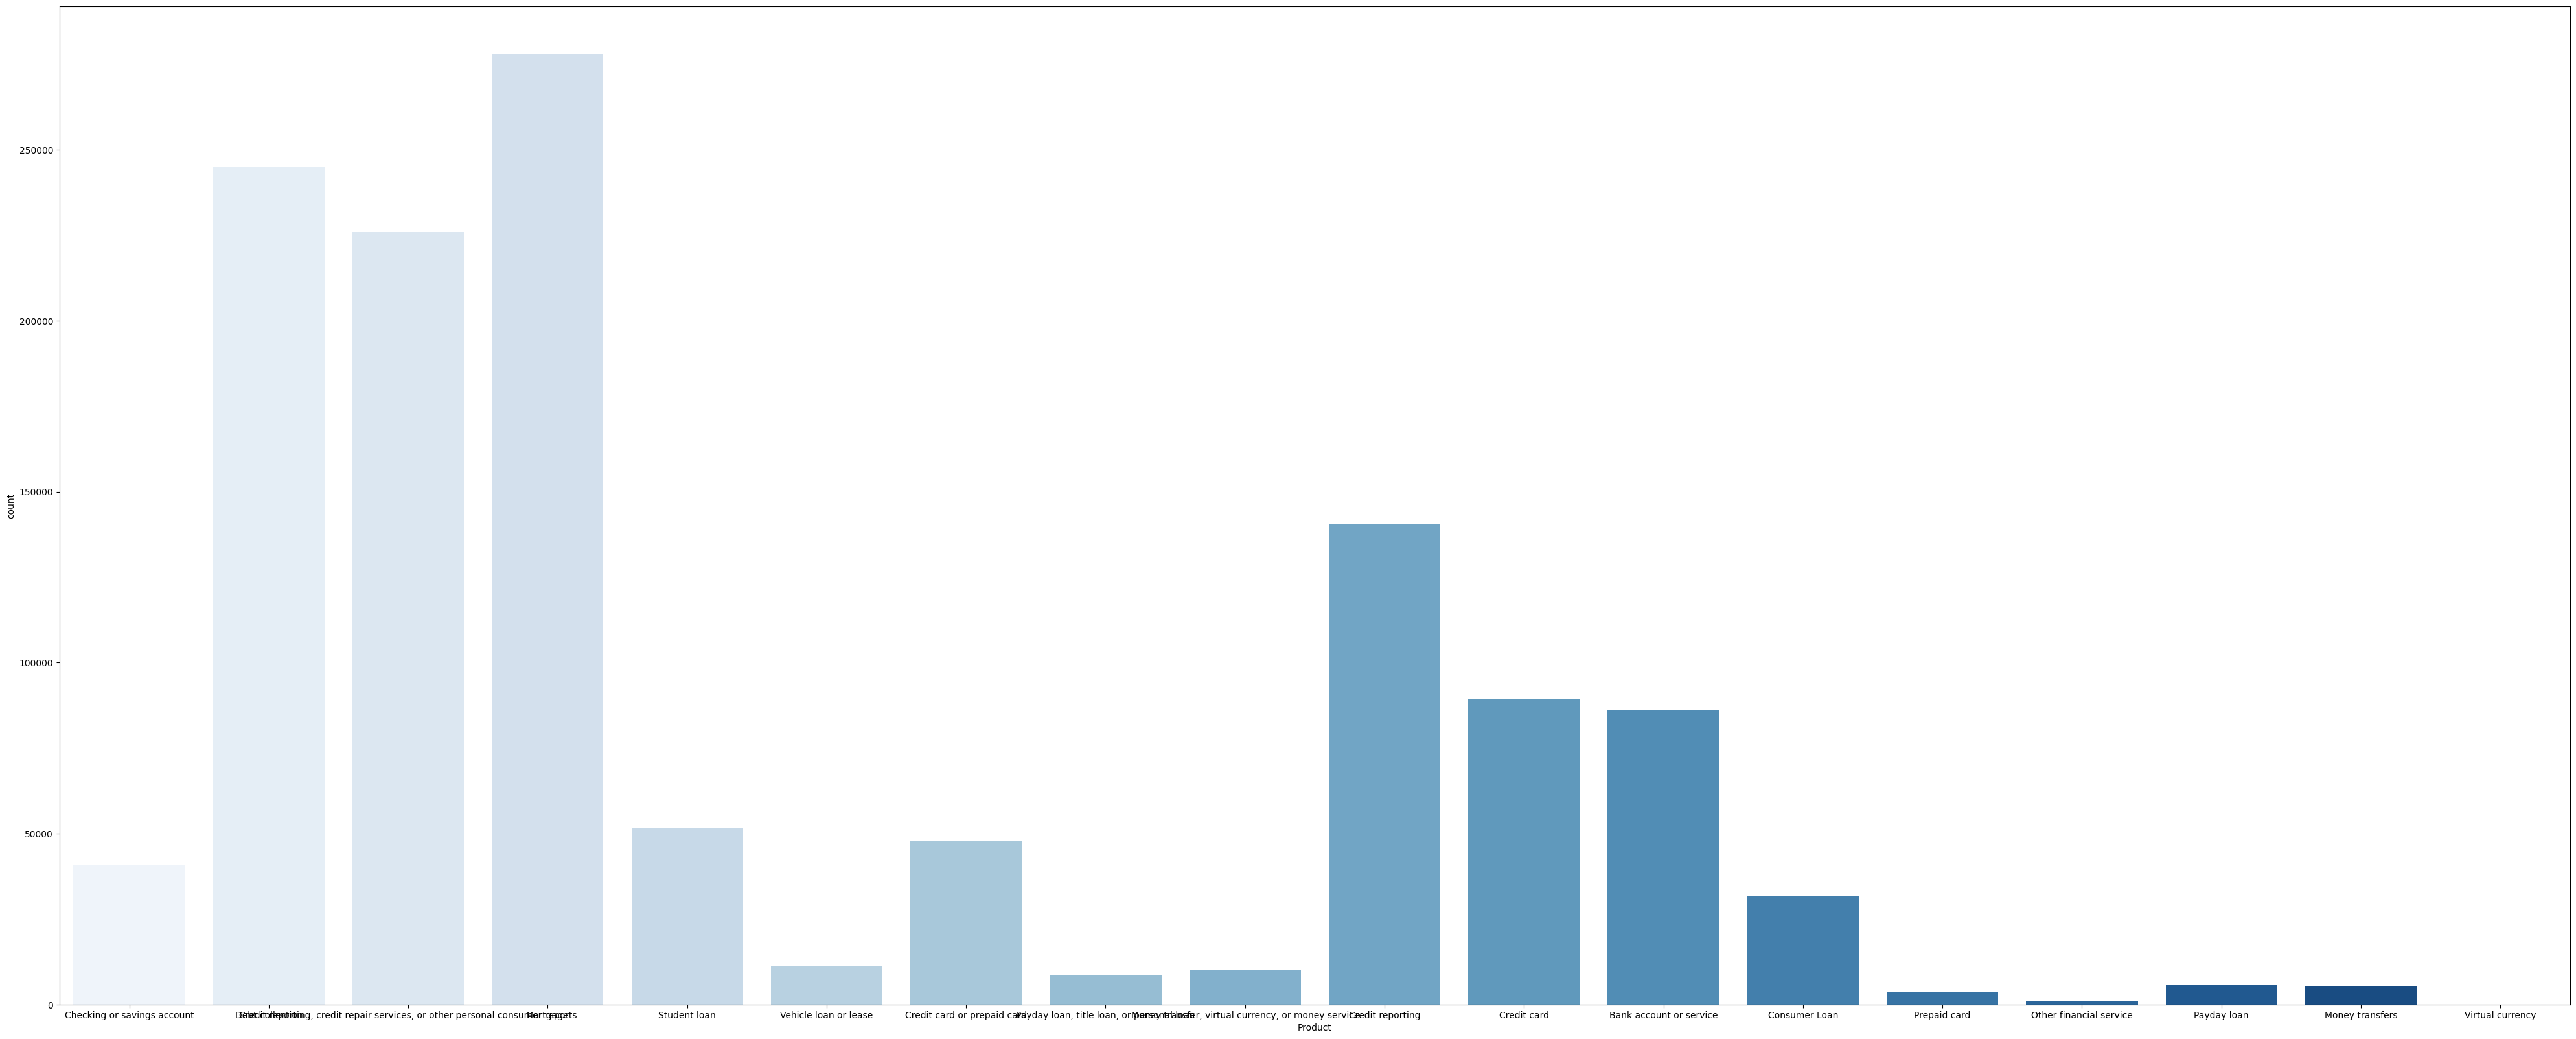

In [20]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(50,20))
sns.countplot(x='Product',data=df2,palette='Blues')
plt.show()

C:\Users\valentino\AppData\Local\Temp\ipykernel_13004\2730855891.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df_top_5, palette='Blues')


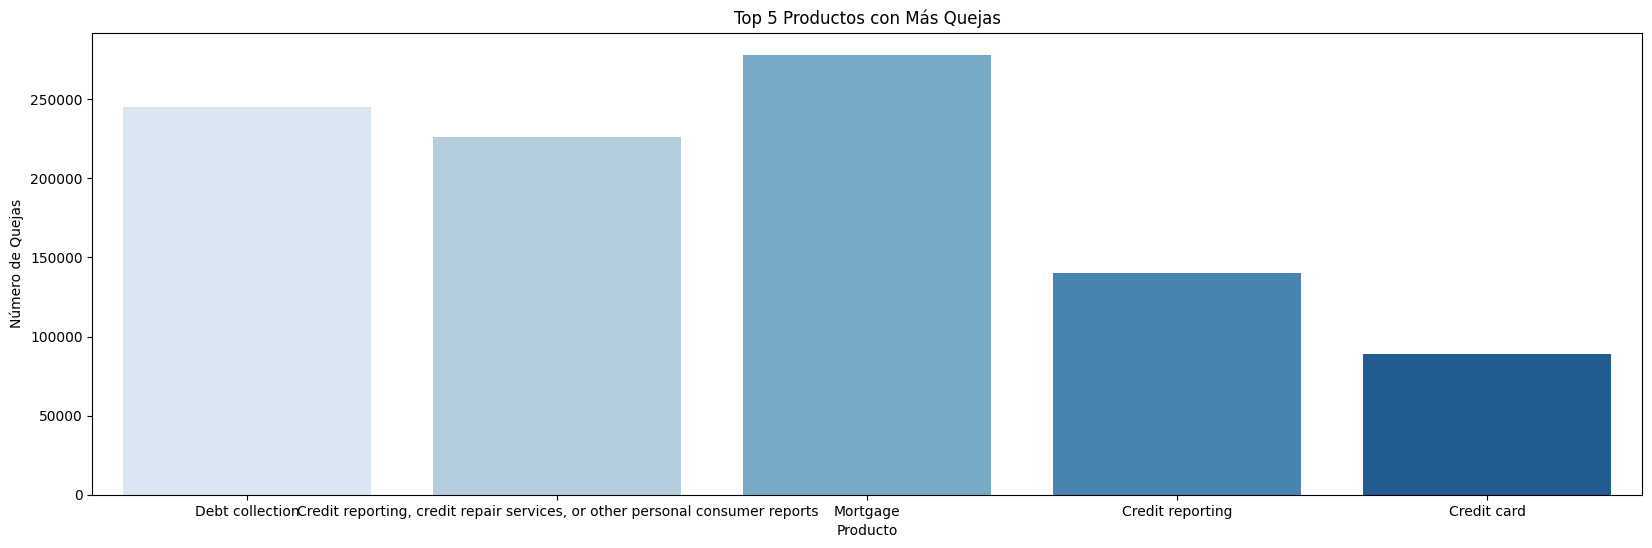

In [21]:
# Calcular las frecuencias de quejas por producto
product_counts = df2['Product'].value_counts()

# Seleccionar los 5 productos con más quejas
top_5_products = product_counts.nlargest(5).index

# Filtrar el DataFrame para incluir solo los 5 productos con más quejas
df_top_5 = df2[df2['Product'].isin(top_5_products)]

# Crear el gráfico de frecuencias
plt.figure(figsize=(20, 6))
sns.countplot(x='Product', data=df_top_5, palette='Blues')
plt.title('Top 5 Productos con Más Quejas')
plt.xlabel('Producto')
plt.ylabel('Número de Quejas')
plt.show()

In [ ]:
NanReplace = {"Country": "Unknown", "Agent": 0, "Company": 0}
df = df.fillna(NanReplace)
df["Children"]=df.Children.fillna(0)

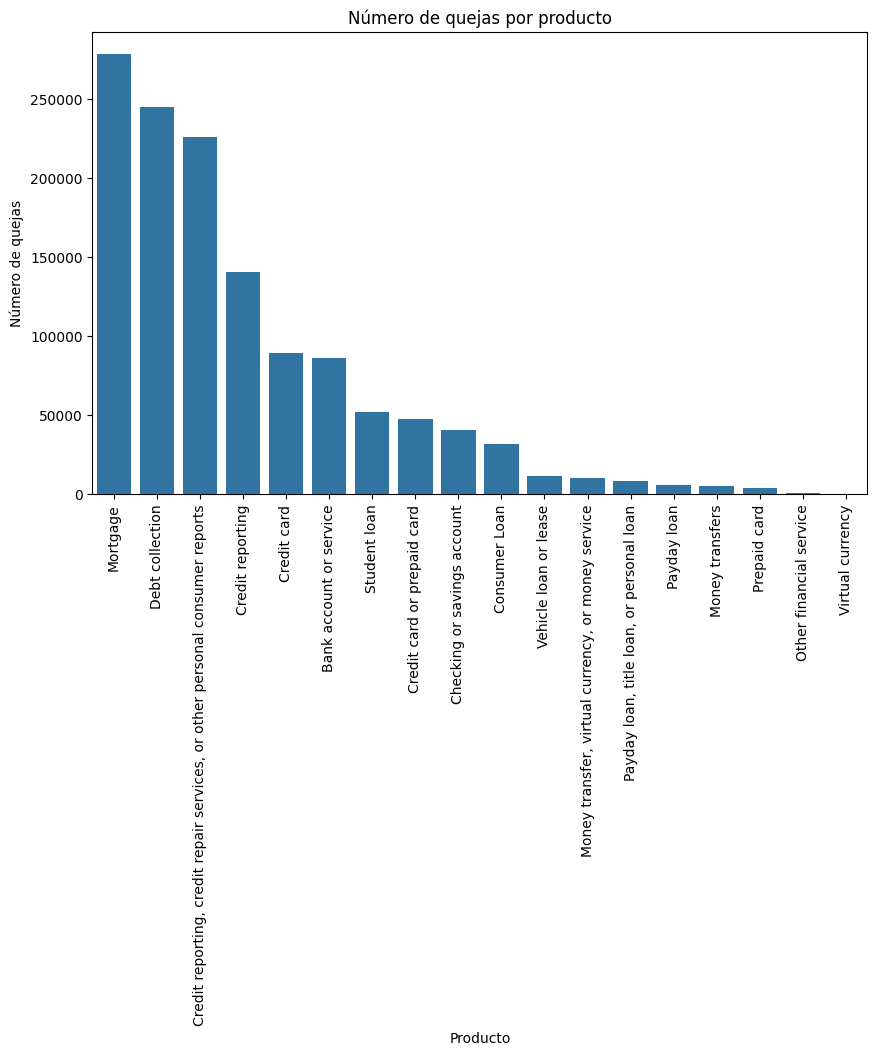

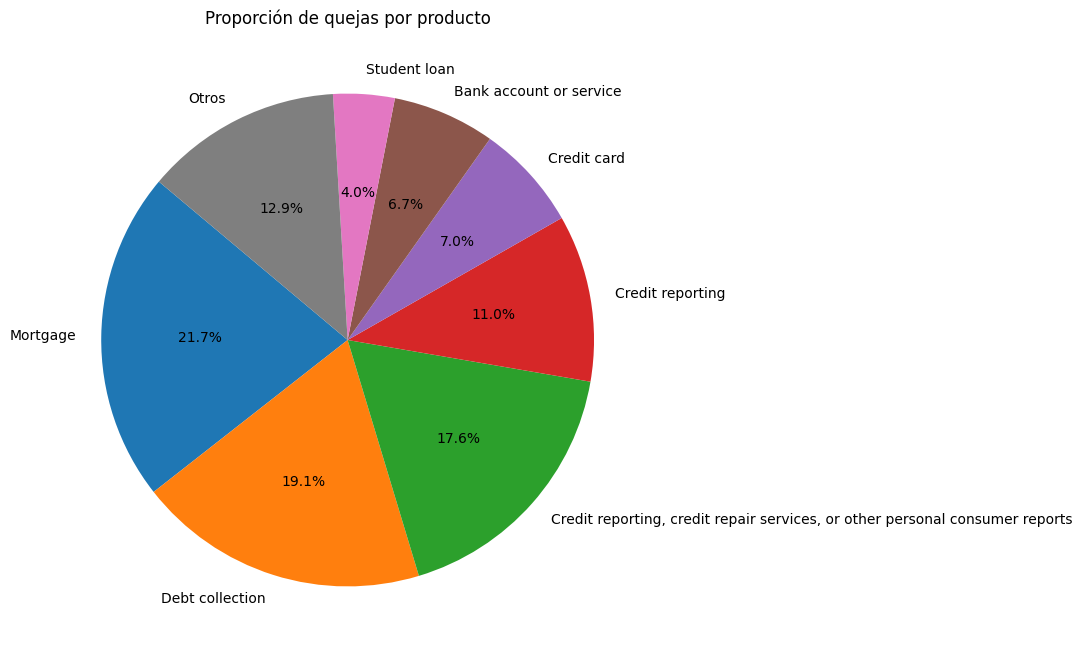

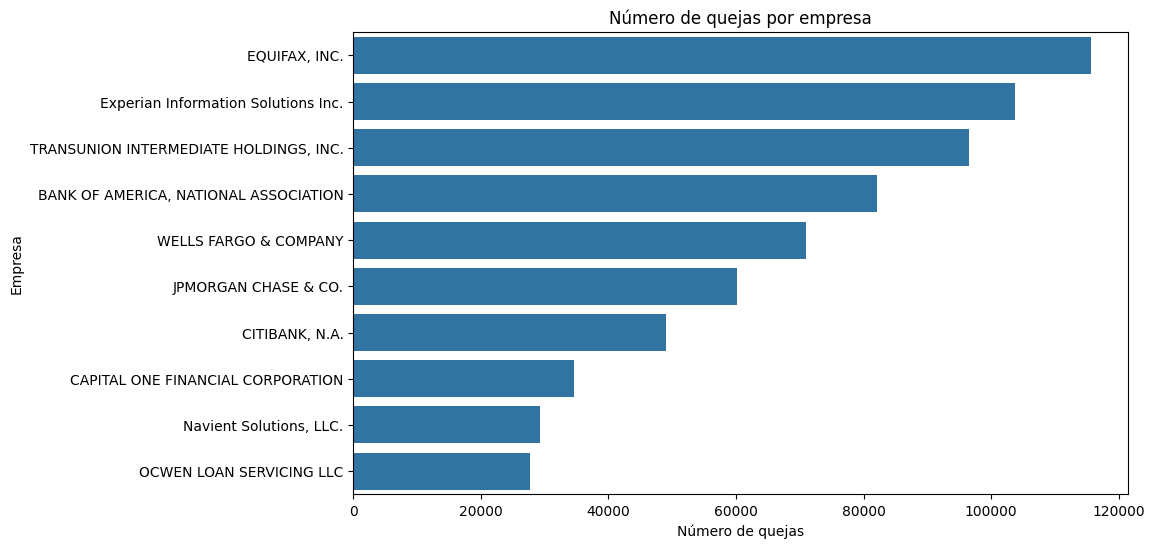

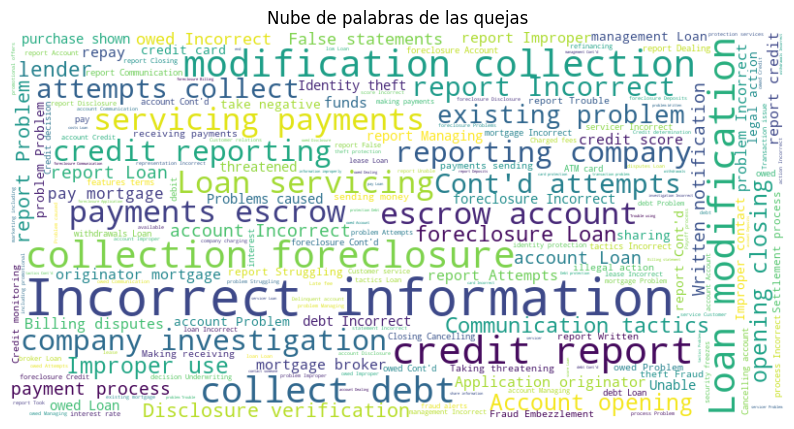

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Cargar el dataset


# Convertir las columnas relevantes a tipo 'category'
categorical_columns = ['Product', 'Sub-product', 'Company','Issue']  # Cambia esto según las columnas de tu dataset
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Gráfico de Barras: Número de quejas por producto
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Número de quejas por producto')
plt.xlabel('Producto')
plt.ylabel('Número de quejas')
plt.show()

# Calcular la proporción de quejas por producto
proporciones = df['Product'].value_counts(normalize=True)

# Identificar productos con proporción menor al 4%
otros_proporciones = proporciones[proporciones < 0.04].sum()

# Filtrar y agrupar los productos según la proporción
proporciones_filtradas = proporciones[proporciones >= 0.04]
proporciones_filtradas['Otros'] = otros_proporciones
# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
proporciones_filtradas.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporción de quejas por producto')
plt.ylabel('')
plt.show()

# Count Plot: Número de quejas por empresa
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Company', order=df['Company'].value_counts().index[:10])  # Mostrando solo las top 10 empresas
plt.title('Número de quejas por empresa')
plt.xlabel('Número de quejas')
plt.ylabel('Empresa')
plt.show()

# Nube de Palabras: Términos más comunes en las quejas
text = ' '.join(df['Issue'])  # Cambia 'queja' por la columna que contiene los textos de las quejas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las quejas')
plt.show()